# BLEU CHRF damage visualization

In [5]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt


Bad key savefig.frameon in file /nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log fi

In [48]:
bleu = pd.read_table('bleu-damage-norecall.tsv', quoting=3, index_col=False)
bleu = bleu.rename(columns={'bleu':'BLEU', 'macrof':'MacroF1', 'microf':'MicroF1', 'macrobleu':'MacroBLEU', 'microbleu':'MicroBLEU'})
bleu.drop(columns=['chrf'], inplace=True)
bleu

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU
0,.,1869,94.91177,99.98495,96.00965,99.67137,95.68407
1,at,250,98.50754,99.98495,99.46440,99.20637,98.59292
2,:,299,98.11789,99.98495,99.35984,99.01944,98.29188
3,that,238,98.52796,99.98495,99.49000,99.37468,98.64910
4,is,344,97.86624,99.98495,99.26381,99.00512,98.05895
...,...,...,...,...,...,...,...
6632,01,1,99.99329,99.98495,99.99573,99.98168,99.99162
6633,089,1,99.99329,99.98495,99.99573,99.98264,99.99166
6634,$,1,99.99329,99.98495,99.99573,99.98293,99.99181
6635,00,1,99.99329,99.98495,99.99573,99.98095,99.99179


In [49]:
chrf = pd.read_table('chrf-damage-norecall.tsv', quoting=3, index_col=False)
chrf['CHRF1'] = 100 * chrf['CHRF1']
chrf['CHRF3'] = 100 * chrf['CHRF3']
chrf

,Type,Frequency,CHRF1,CHRF3
0,with,310,99.1849,98.8892
1,"""",304,99.5120,99.4393
2,.,1869,99.3211,98.8746
3,on,349,99.3419,99.1757
4,at,250,99.5480,99.4284
...,...,...,...,...
6632,089,1,99.9976,99.9969
6633,01,1,99.9979,99.9974
6634,00,1,99.9979,99.9974
6635,$,1,99.9982,99.9979


In [50]:
chrf.drop(columns=['Frequency'], inplace=True)
table = bleu.merge(right=chrf, on='Type', how='inner')
table   

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU,CHRF1,CHRF3
0,.,1869,94.91177,99.98495,96.00965,99.67137,95.68407,99.3211,98.8746
1,at,250,98.50754,99.98495,99.46440,99.20637,98.59292,99.5480,99.4284
2,:,299,98.11789,99.98495,99.35984,99.01944,98.29188,99.4671,99.3956
3,that,238,98.52796,99.98495,99.49000,99.37468,98.64910,99.4494,99.2219
4,is,344,97.86624,99.98495,99.26381,99.00512,98.05895,99.3168,99.1526
...,...,...,...,...,...,...,...,...,...
6632,01,1,99.99329,99.98495,99.99573,99.98168,99.99162,99.9979,99.9974
6633,089,1,99.99329,99.98495,99.99573,99.98264,99.99166,99.9976,99.9969
6634,$,1,99.99329,99.98495,99.99573,99.98293,99.99181,99.9982,99.9979
6635,00,1,99.99329,99.98495,99.99573,99.98095,99.99179,99.9979,99.9974


In [51]:
table = table.sort_values(by=['Frequency', 'Type'], ascending=False)
table

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU,CHRF1,CHRF3
17,the,3019,81.47180,99.98495,93.55568,91.72893,84.88915,93.3067,91.2667
0,.,1869,94.91177,99.98495,96.00965,99.67137,95.68407,99.3211,98.8746
16,",",1592,89.45531,99.98495,96.60073,93.98180,90.72848,97.0903,96.7188
15,of,849,94.41526,99.98495,98.18620,96.97970,95.09274,98.2062,97.8053
18,in,833,94.92969,99.98495,98.22034,97.39315,95.38419,98.4198,98.0255
...,...,...,...,...,...,...,...,...,...
6631,059,1,99.99329,99.98495,99.99573,99.97501,99.99058,99.9976,99.9969
6632,01,1,99.99329,99.98495,99.99573,99.98168,99.99162,99.9979,99.9974
6635,00,1,99.99329,99.98495,99.99573,99.98095,99.99179,99.9979,99.9974
3642,-stories,1,99.99329,99.98495,99.99573,99.97954,99.99163,99.9961,99.9942


In [52]:
columns = 'BLEU MacroF1 MicroF1 MacroBLEU MicroBLEU CHRF1 CHRF3'.split()
damage = table.copy()
for col in columns:
    damage[col] = 100 - damage[col]

damage_norecall = damage
damage

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU,CHRF1,CHRF3
17,the,3019,18.52820,0.01505,6.44432,8.27107,15.11085,6.6933,8.7333
0,.,1869,5.08823,0.01505,3.99035,0.32863,4.31593,0.6789,1.1254
16,",",1592,10.54469,0.01505,3.39927,6.01820,9.27152,2.9097,3.2812
15,of,849,5.58474,0.01505,1.81380,3.02030,4.90726,1.7938,2.1947
18,in,833,5.07031,0.01505,1.77966,2.60685,4.61581,1.5802,1.9745
...,...,...,...,...,...,...,...,...,...
6631,059,1,0.00671,0.01505,0.00427,0.02499,0.00942,0.0024,0.0031
6632,01,1,0.00671,0.01505,0.00427,0.01832,0.00838,0.0021,0.0026
6635,00,1,0.00671,0.01505,0.00427,0.01905,0.00821,0.0021,0.0026
3642,-stories,1,0.00671,0.01505,0.00427,0.02046,0.00837,0.0039,0.0058


In [9]:

"""
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib import cm
import numpy as np
plt.style.use('seaborn-deep')
params = {'legend.fontsize': 16,
          'figure.figsize': (15.0, 8.0),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'font.size': 16}
plt.rcParams.update(params)
"""

/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


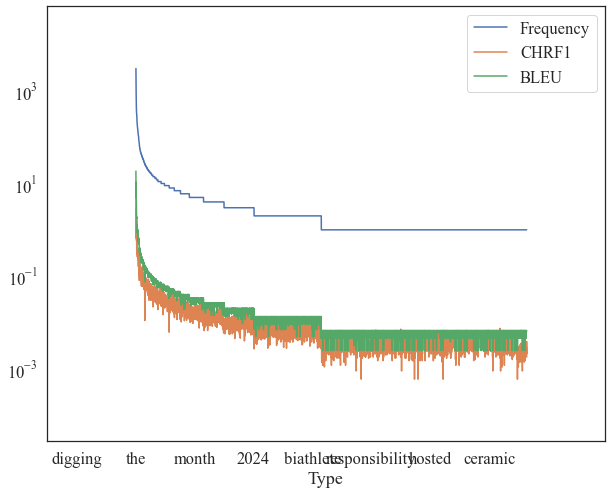

In [29]:
sns.set(font="Times New Roman", style='white',font_scale=1.5)
ax = damage.plot(x='Type', y=['Frequency', 'CHRF1', 'BLEU'], logy=True, figsize=(10, 8))
#ax.margins(x=0.1, y=0.05)
#sns.despine()
#plt.subplots_adjust(left=-0.1)
plt.margins(0.2)

x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.axis((x0 - margin_x, x1, y0, y1))
#plt.savefig('bleu-chrf-damage-norecall.pdf')

/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


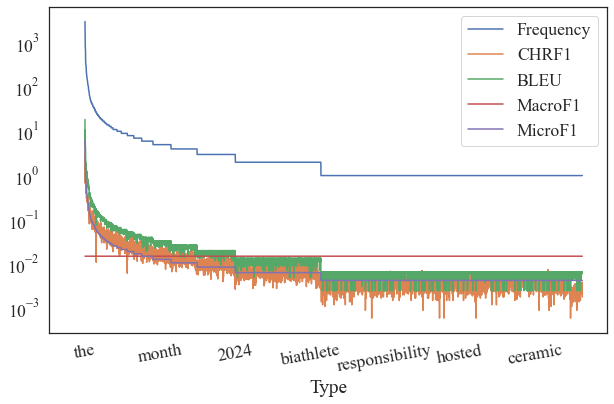

In [41]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
damage.plot(x='Type', y=['Frequency', 'CHRF1', 'BLEU',  'MacroF1', 'MicroF1'], logy=True, figsize=(10, 6))
x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.xticks(rotation=10)
plt.axis((x0 - margin_x, x1, y0, y1))
plt.savefig('bleu-chrf-macro-micro-norecall.pdf')

# Swap in damage

A type was swapped with an OOV type of same number of char, to be fair on legths.

All in one CSV

In [53]:
scores = pd.read_table('swapin-damage-lengthmatch.tsv', quoting=3, index_col=False)
scores = scores.rename(columns={'bleu':'BLEU', 'macrof':'MacroF1', 'microf':'MicroF1'})
scores

,Type,Frequency,BLEU,MacroF1,MicroF1,CHRF1,CHRF3
0,at,250,98.45738,99.9699,99.46227,0.993767,0.993767
1,-,156,98.97860,99.9699,99.66285,0.996690,0.996690
2,.,1869,94.63430,99.9699,96.00760,0.987637,0.987637
3,is,344,97.79850,99.9699,99.26169,0.990857,0.990857
4,),189,98.78764,99.9699,99.59244,0.996434,0.996434
...,...,...,...,...,...,...,...
6632,1000,1,99.99308,99.9699,99.99360,0.999961,0.999961
6633,$,1,99.99308,99.9699,99.99360,0.999979,0.999979
6634,01,1,99.99308,99.9699,99.99360,0.999973,0.999973
6635,00,1,99.99308,99.9699,99.99360,0.999973,0.999973


In [55]:
columns = 'BLEU MacroF1 MicroF1 CHRF1 CHRF3'.split()
scores = scores.sort_values(by=['Frequency', 'Type'], ascending=False)
damage = scores.copy()
damage['CHRF1'] = 100 * damage['CHRF1']
damage['CHRF3'] = 100 * damage['CHRF3']
for col in columns:
    damage[col] = 100 - damage[col]
damage_swapin = damage
damage

,Type,Frequency,BLEU,MacroF1,MicroF1,CHRF1,CHRF3
10,the,3019,18.83480,0.0301,6.44631,9.3870,9.3870
2,.,1869,5.36570,0.0301,3.99240,1.2363,1.2363
11,",",1592,10.78283,0.0301,3.40133,3.3737,3.3737
17,of,849,5.73456,0.0301,1.81589,2.3034,2.3034
22,in,833,5.21915,0.0301,1.78175,2.1110,2.1110
...,...,...,...,...,...,...,...
6631,059,1,0.00692,0.0301,0.00640,0.0033,0.0033
6634,01,1,0.00692,0.0301,0.00640,0.0027,0.0027
6635,00,1,0.00692,0.0301,0.00640,0.0027,0.0027
3640,-stories,1,0.00692,0.0301,0.00640,0.0063,0.0063


/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


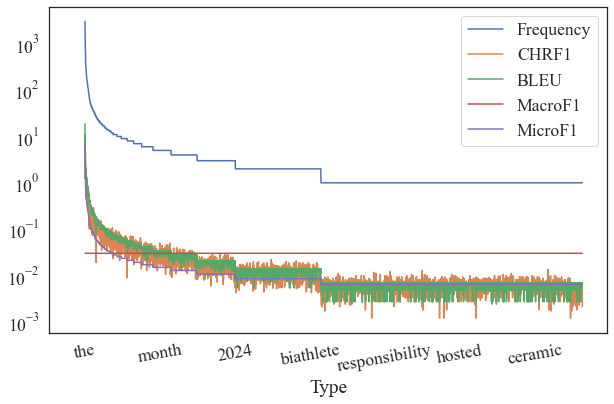

In [47]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
damage.plot(x='Type', y=['Frequency', 'CHRF1', 'BLEU', 'MacroF1', 'MicroF1'], logy=True, figsize=(10, 6))
plt.xticks(rotation=10)
x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.axis((x0 - margin_x, x1, y0, y1))
plt.savefig('bleu-chrf-macro-micro-swapin-lenmatch.pdf')

In [58]:
damage_both = damage_norecall.merge(right=damage_swapin, on='Type', how='inner', suffixes=('_0R', '_S'))
damage_both

,Type,Frequency_0R,BLEU_0R,MacroF1_0R,MicroF1_0R,MacroBLEU,MicroBLEU,CHRF1_0R,CHRF3_0R,Frequency_S,BLEU_S,MacroF1_S,MicroF1_S,CHRF1_S,CHRF3_S
0,the,3019,18.52820,0.01505,6.44432,8.27107,15.11085,6.6933,8.7333,3019,18.83480,0.0301,6.44631,9.3870,9.3870
1,.,1869,5.08823,0.01505,3.99035,0.32863,4.31593,0.6789,1.1254,1869,5.36570,0.0301,3.99240,1.2363,1.2363
2,",",1592,10.54469,0.01505,3.39927,6.01820,9.27152,2.9097,3.2812,1592,10.78283,0.0301,3.40133,3.3737,3.3737
3,of,849,5.58474,0.01505,1.81380,3.02030,4.90726,1.7938,2.1947,849,5.73456,0.0301,1.81589,2.3034,2.3034
4,in,833,5.07031,0.01505,1.77966,2.60685,4.61581,1.5802,1.9745,833,5.21915,0.0301,1.78175,2.1110,2.1110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632,059,1,0.00671,0.01505,0.00427,0.02499,0.00942,0.0024,0.0031,1,0.00692,0.0301,0.00640,0.0033,0.0033
6633,01,1,0.00671,0.01505,0.00427,0.01832,0.00838,0.0021,0.0026,1,0.00692,0.0301,0.00640,0.0027,0.0027
6634,00,1,0.00671,0.01505,0.00427,0.01905,0.00821,0.0021,0.0026,1,0.00692,0.0301,0.00640,0.0027,0.0027
6635,-stories,1,0.00671,0.01505,0.00427,0.02046,0.00837,0.0039,0.0058,1,0.00692,0.0301,0.00640,0.0063,0.0063


/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(-477.79200000000003, 6967.8, 0.0002773739410746285, 6530.534169707614)

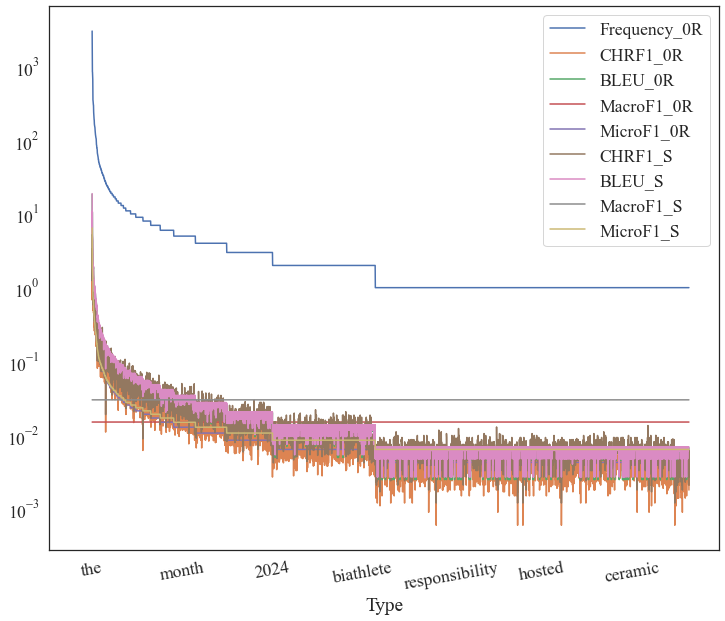

In [62]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
fields = ['Frequency_0R', 'CHRF1_0R', 'BLEU_0R', 'MacroF1_0R', 'MicroF1_0R', 'CHRF1_S', 'BLEU_S', 'MacroF1_S', 'MicroF1_S']
damage_both.plot(x='Type', y=fields, logy=True, figsize=(12, 10))
plt.xticks(rotation=10)
x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.axis((x0 - margin_x, x1, y0, y1))
#plt.savefig('bleu-chrf-macro-micro-all.pdf')